In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [3]:
df1 = df.drop(['pose_id'],axis=1)
df1.head()

,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,-18.204160,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [4]:
df1.shape

(1097, 100)

In [5]:
df1.pose.value_counts()

jumping_jacks_down    151
jumping_jacks_up      145
pullups_down          123
pushups_up            115
squats_up             111
pullups_up            108
squats_down           101
situp_down             82
pushups_down           82
situp_up               79
Name: pose, dtype: int64

In [20]:
class_dis=df1.pose.value_counts().sort_index(ascending=True).values
class_dis

array([151, 145, 123, 108,  82, 115,  82,  79, 101, 111], dtype=int64)

In [14]:
class_names = df1.pose.unique().tolist()
class_names = sorted(class_names)
class_names

['jumping_jacks_down',
 'jumping_jacks_up',
 'pullups_down',
 'pullups_up',
 'pushups_down',
 'pushups_up',
 'situp_down',
 'situp_up',
 'squats_down',
 'squats_up']

In [22]:
# Pie Plot
fig = px.pie(names=class_names, values=class_dis, title="Training Class Distribution", hole=0.2)
fig.update_layout({'title':{'x':0.5}})
fig.show()

fig = px.bar(x=class_names, y=class_dis, color=class_names)
fig.show()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pose                1097 non-null   object 
 1   x_nose              1097 non-null   float64
 2   y_nose              1097 non-null   float64
 3   z_nose              1097 non-null   float64
 4   x_left_eye_inner    1097 non-null   float64
 5   y_left_eye_inner    1097 non-null   float64
 6   z_left_eye_inner    1097 non-null   float64
 7   x_left_eye          1097 non-null   float64
 8   y_left_eye          1097 non-null   float64
 9   z_left_eye          1097 non-null   float64
 10  x_left_eye_outer    1097 non-null   float64
 11  y_left_eye_outer    1097 non-null   float64
 12  z_left_eye_outer    1097 non-null   float64
 13  x_right_eye_inner   1097 non-null   float64
 14  y_right_eye_inner   1097 non-null   float64
 15  z_right_eye_inner   1097 non-null   float64
 16  x_rig

In [27]:
df1.isnull().sum()

pose                  0
x_nose                0
y_nose                0
z_nose                0
x_left_eye_inner      0
                     ..
y_left_foot_index     0
z_left_foot_index     0
x_right_foot_index    0
y_right_foot_index    0
z_right_foot_index    0
Length: 100, dtype: int64

In [32]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 1 categorical variables

The categorical variables : ['pose']


In [33]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 99 numerical variables

The numerical variables : ['x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner', 'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye', 'z_left_eye', 'x_left_eye_outer', 'y_left_eye_outer', 'z_left_eye_outer', 'x_right_eye_inner', 'y_right_eye_inner', 'z_right_eye_inner', 'x_right_eye', 'y_right_eye', 'z_right_eye', 'x_right_eye_outer', 'y_right_eye_outer', 'z_right_eye_outer', 'x_left_ear', 'y_left_ear', 'z_left_ear', 'x_right_ear', 'y_right_ear', 'z_right_ear', 'x_mouth_left', 'y_mouth_left', 'z_mouth_left', 'x_mouth_right', 'y_mouth_right', 'z_mouth_right', 'x_left_shoulder', 'y_left_shoulder', 'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'z_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow', 'x_right_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_wrist', 'y_left_wrist', 'z_left_wrist', 'x_right_wrist', 'y_right_wrist', 'z_right_wrist', 'x_left_pinky_1', 'y_left_pinky_1', 'z_left_pinky_1', 'x_right_pinky_1', 'y

In [36]:
df1[numerical].corr()

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
x_nose,1.000000,-0.030463,0.032231,0.998974,-0.028513,0.048599,0.998051,-0.025814,0.048578,0.996674,...,0.050183,-0.762278,0.012019,-0.129371,-0.708493,-0.014473,0.057305,-0.692276,-0.001521,-0.137567
y_nose,-0.030463,1.000000,-0.262148,-0.032143,0.998035,-0.291074,-0.031222,0.997303,-0.291092,-0.030874,...,0.417924,0.005741,-0.636146,0.447754,0.027433,-0.459024,0.432291,0.013774,-0.484717,0.462707
z_nose,0.032231,-0.262148,1.000000,0.020067,-0.237418,0.997413,0.010235,-0.233277,0.997414,0.000463,...,-0.693748,0.019916,0.138355,-0.680530,-0.151175,0.045076,-0.636721,0.025775,0.028102,-0.623470
x_left_eye_inner,0.998974,-0.032143,0.020067,1.000000,-0.030500,0.036474,0.999780,-0.027668,0.036455,0.999126,...,0.048561,-0.774727,0.012633,-0.119872,-0.716922,-0.008271,0.053890,-0.708598,0.000031,-0.129786
y_left_eye_inner,-0.028513,0.998035,-0.237418,-0.030500,1.000000,-0.266190,-0.029988,0.999852,-0.266208,-0.030066,...,0.397764,0.005914,-0.637293,0.430069,0.019072,-0.467863,0.412818,0.013654,-0.495838,0.445613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y_left_foot_index,-0.014473,-0.459024,0.045076,-0.008271,-0.467863,0.060266,-0.005470,-0.468958,0.060275,-0.002252,...,-0.119015,-0.035528,0.854956,-0.050401,0.003925,1.000000,-0.163168,-0.071401,0.894148,-0.094733
z_left_foot_index,0.057305,0.432291,-0.636721,0.053890,0.412818,-0.652333,0.055739,0.409030,-0.652355,0.057408,...,0.991741,0.044285,-0.218578,0.785111,0.086540,-0.163168,1.000000,0.100432,-0.068901,0.787229
x_right_foot_index,-0.692276,0.013774,0.025775,-0.708598,0.013654,0.020793,-0.713973,0.009809,0.020756,-0.719855,...,0.090760,0.979905,0.018274,0.018324,0.838516,-0.071401,0.100432,1.000000,0.022755,0.039298
y_right_foot_index,-0.001521,-0.484717,0.028102,0.000031,-0.495838,0.048600,0.001675,-0.499057,0.048600,0.003811,...,-0.029796,0.026808,0.944033,-0.088249,0.080089,0.894148,-0.068901,0.022755,1.000000,-0.133007


array([[<AxesSubplot: title={'center': 'x_nose'}>,
        <AxesSubplot: title={'center': 'y_nose'}>,
        <AxesSubplot: title={'center': 'z_nose'}>,
        <AxesSubplot: title={'center': 'x_left_eye_inner'}>,
        <AxesSubplot: title={'center': 'y_left_eye_inner'}>,
        <AxesSubplot: title={'center': 'z_left_eye_inner'}>,
        <AxesSubplot: title={'center': 'x_left_eye'}>,
        <AxesSubplot: title={'center': 'y_left_eye'}>,
        <AxesSubplot: title={'center': 'z_left_eye'}>,
        <AxesSubplot: title={'center': 'x_left_eye_outer'}>],
       [<AxesSubplot: title={'center': 'y_left_eye_outer'}>,
        <AxesSubplot: title={'center': 'z_left_eye_outer'}>,
        <AxesSubplot: title={'center': 'x_right_eye_inner'}>,
        <AxesSubplot: title={'center': 'y_right_eye_inner'}>,
        <AxesSubplot: title={'center': 'z_right_eye_inner'}>,
        <AxesSubplot: title={'center': 'x_right_eye'}>,
        <AxesSubplot: title={'center': 'y_right_eye'}>,
        <AxesSubp

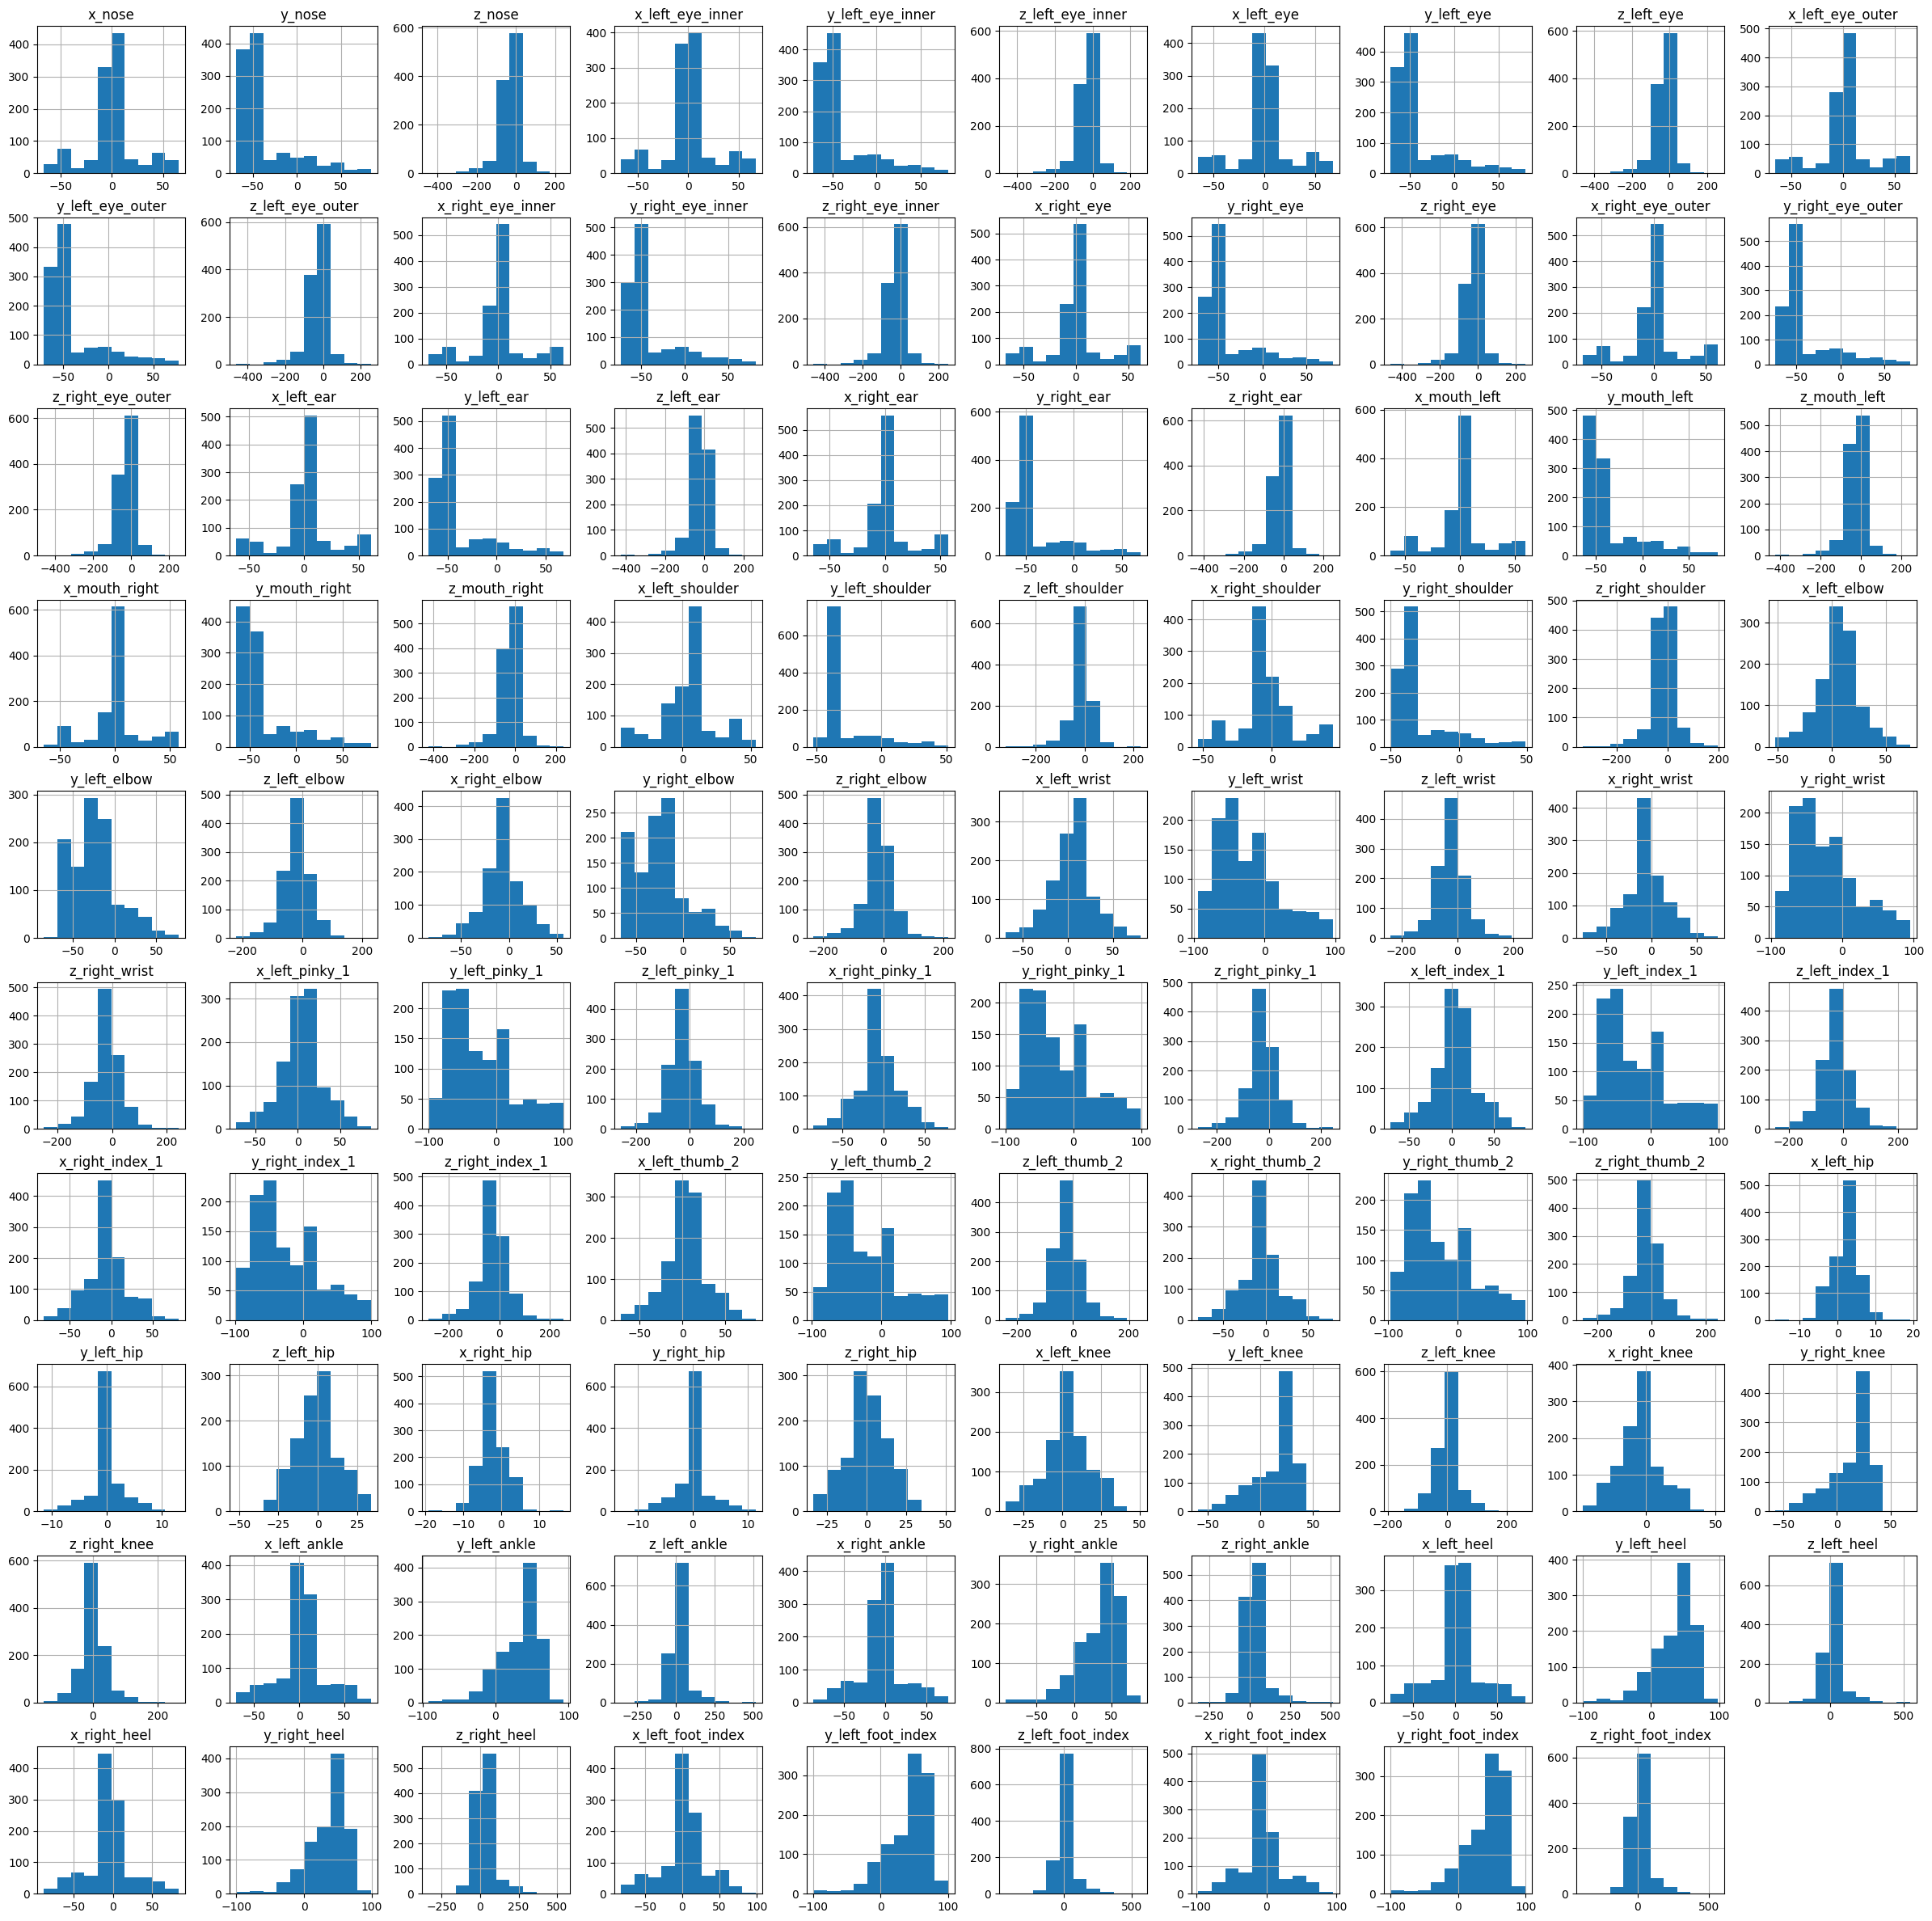

In [38]:
df1.hist(figsize=(30,30))

<AxesSubplot: >

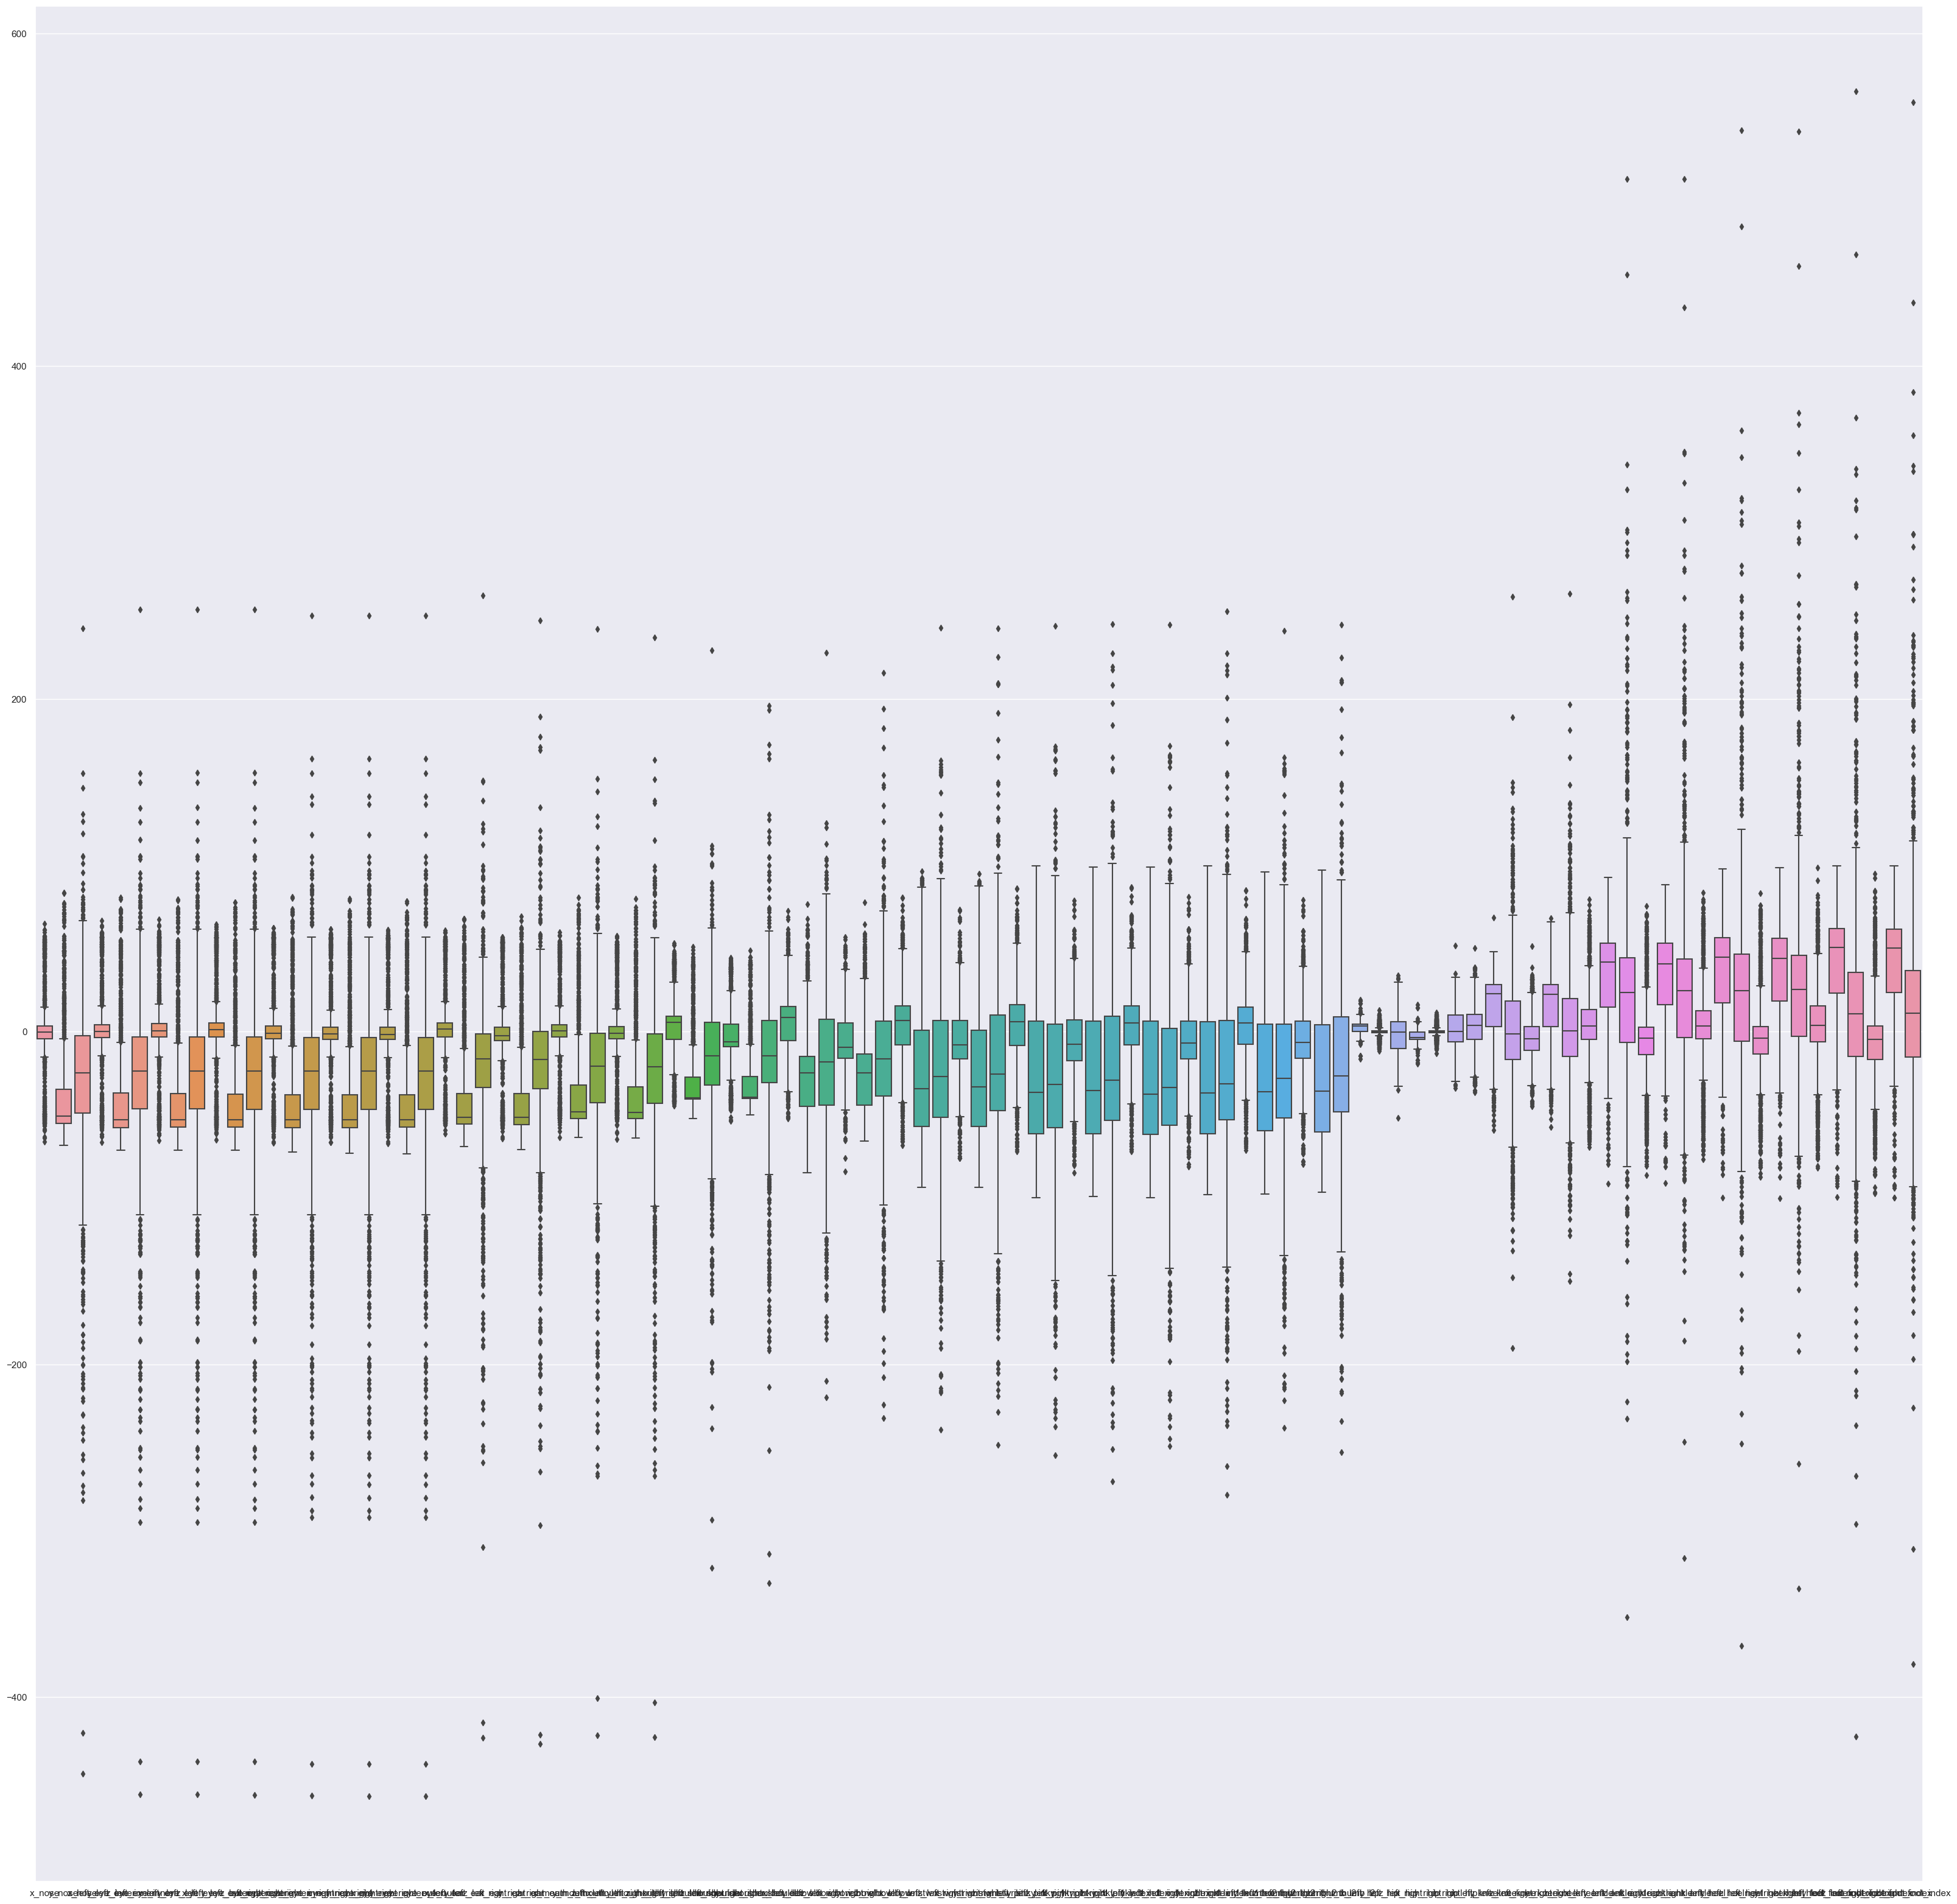

In [39]:
sns.set(rc={'figure.figsize':(40,40)})
sns.boxplot(df1)

In [40]:
for i in range(0,len(numerical)-1):
    IQR = df1['{}'.format(numerical[i])].quantile(0.75) - df1['{}'.format(numerical[i])].quantile(0.25)
    Lower = df1['{}'.format(numerical[i])].quantile(0.25) - (IQR * 3)
    Upper = df1['{}'.format(numerical[i])].quantile(0.75) + (IQR * 3)
    print('{name} outliers are values < {lowerboundary} or > {upperboundary}'.format(name=str(numerical[i]),lowerboundary=Lower, upperboundary=Upper))

x_nose outliers are values < -27.0527166 or > 26.4816188
y_nose outliers are values < -116.66546200000002 or > 26.62572100000002
z_nose outliers are values < -187.69803000000002 or > 136.47785000000002
x_left_eye_inner outliers are values < -25.984392600000003 or > 26.850179400000002
y_left_eye_inner outliers are values < -119.23648 or > 24.72097000000001
z_left_eye_inner outliers are values < -176.6960229 or > 127.1039372
x_left_eye outliers are values < -27.7046189 or > 29.3075888
y_left_eye outliers are values < -118.15360000000001 or > 23.538930000000008
z_left_eye outliers are values < -176.6583411 or > 127.0724828
x_left_eye_outer outliers are values < -28.9331406 or > 31.033342200000003
y_left_eye_outer outliers are values < -116.85563300000001 or > 21.832161
z_left_eye_outer outliers are values < -176.73075400000002 or > 127.13745400000002
x_right_eye_inner outliers are values < -26.6566601 or > 25.8138958
y_right_eye_inner outliers are values < -116.83006400000001 or > 21.4780

In [44]:
# df1.describe().to_csv('df1_outlier.csv')

In [45]:
df1.shape

(1097, 100)

outlier analysis later!

In [46]:
df1.head()

,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
0,squats_up,-0.382815,-48.231250,-54.405792,0.137189,-50.040543,-51.997875,0.502047,-50.058890,-51.986694,...,33.283375,-12.302963,52.377000,21.567219,16.609533,54.351162,15.890617,-16.779694,55.382572,2.050140
1,situp_down,54.146880,-12.822491,5.564175,56.762527,-11.221117,-0.363063,56.795986,-10.608183,-0.378148,...,-8.073100,-37.519974,4.045297,62.104233,-60.468560,6.281939,-8.185631,-52.589350,-3.852214,59.750070
2,situp_down,9.891440,-54.147266,85.344970,12.784414,-55.229970,88.534775,14.006874,-54.291880,88.543910,...,-132.024460,-61.214890,53.040688,-16.786700,-5.844672,99.829030,-166.543060,-73.826830,38.470097,-40.519830
3,jumping_jacks_up,0.904673,-51.350130,-33.606970,1.338871,-53.172337,-30.013737,1.743913,-53.050697,-30.007776,...,51.615970,-15.543400,38.251835,34.033176,16.610210,46.572014,38.680614,-18.784650,45.098710,20.343110
4,jumping_jacks_down,-3.153129,-55.255062,-17.745928,-2.046205,-57.477790,-18.198952,-1.506304,-57.428230,-18.204160,...,-2.849554,2.811829,56.000500,56.605590,0.566345,66.231050,-19.252045,-3.451297,60.029484,45.503677


In [190]:
X = df1.drop(['pose'],axis=1)
y = df1.pose

In [170]:
y.value_counts()

jumping_jacks_down    151
jumping_jacks_up      145
pullups_down          123
pushups_up            115
squats_up             111
pullups_up            108
squats_down           101
situp_down             82
pushups_down           82
situp_up               79
Name: pose, dtype: int64

In [171]:
len(class_names)

10

In [172]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((877, 99), (220, 99), (877,), (220,))

In [173]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_RF = scaler.fit_transform(X_train)

X_test_RF = scaler.transform(X_test)

In [174]:
X_train_RF = pd.DataFrame(X_train_RF, columns=[cols])
X_test_RF = pd.DataFrame(X_test_RF, columns=[cols])
X_train_RF.shape, X_test_RF.shape

((877, 99), (220, 99))

In [52]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8273


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=1,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [54]:
ypred = clf.predict(X_test_RF)
print('Model accuracy score with Gridsearch RF : {0:0.4f}'. format(accuracy_score(y_test, ypred)))

Model accuracy score with Gridsearch RF : 0.8591


Now  with cnn

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPool2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [124]:
from sklearn.decomposition import PCA

In [192]:
X = df1.drop(['pose'],axis=1)
y = df1.pose

In [125]:
pca=PCA(0.95)
pca.fit(X)
X_=pca.transform(X)

In [126]:
X.shape, X_.shape

((1097, 99), (1097, 8))

In [193]:
y=LabelEncoder().fit_transform(y)

In [196]:
# X_train, X_test, y_train, y_test=train_test_split(X_, y, train_size=0.75)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((822, 8), (275, 8), (822,), (275,))

In [197]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((822, 99), (275, 99), (822,), (275,))

In [129]:
from keras import models, layers
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [198]:
exercise_model = Sequential()
exercise_model.add(Dense(1024, input_shape = (99,), activation = "relu"))
exercise_model.add(Dropout(0.2))
exercise_model.add(Dense(512, activation = "relu"))
exercise_model.add(Dropout(0.2))
exercise_model.add(Dense(256, activation = "relu"))
exercise_model.add(Dropout(0.5))
exercise_model.add(Dense(10, activation = "softmax"))


In [199]:
exercise_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1024)              102400    
                                                                 
 dropout_20 (Dropout)        (None, 1024)              0         
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 10)              

In [200]:
exercise_model.compile( optimizer=RMSprop(learning_rate=0.001), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )

In [201]:
es = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [202]:
sb = ModelCheckpoint("mymodel.h5", save_best_only=True)

In [203]:
history=exercise_model.fit(X_train, y_train, epochs=600, validation_split=0.20 ,batch_size=4, validation_batch_size=14,callbacks=[es,sb])

Epoch 1/600
165/165 [==============================] - 1s 6ms/step - loss: 14.3574 - accuracy: 0.3516 - val_loss: 6.8466 - val_accuracy: 0.5273
Epoch 2/600
165/165 [==============================] - 1s 4ms/step - loss: 6.6934 - accuracy: 0.4414 - val_loss: 1.9228 - val_accuracy: 0.5939
Epoch 3/600
165/165 [==============================] - 1s 3ms/step - loss: 4.7942 - accuracy: 0.4688 - val_loss: 1.3180 - val_accuracy: 0.6606
Epoch 4/600
165/165 [==============================] - 1s 3ms/step - loss: 3.0745 - accuracy: 0.4962 - val_loss: 1.2674 - val_accuracy: 0.6485
Epoch 5/600
165/165 [==============================] - 1s 3ms/step - loss: 3.0258 - accuracy: 0.5297 - val_loss: 1.2775 - val_accuracy: 0.6485
Epoch 6/600
165/165 [==============================] - 1s 3ms/step - loss: 2.7747 - accuracy: 0.5525 - val_loss: 1.3003 - val_accuracy: 0.6485
Epoch 7/600
165/165 [==============================] - 1s 3ms/step - loss: 2.7433 - accuracy: 0.5419 - val_loss: 1.0335 - val_accuracy: 0.684

Text(0.5, 1.0, 'Loss')

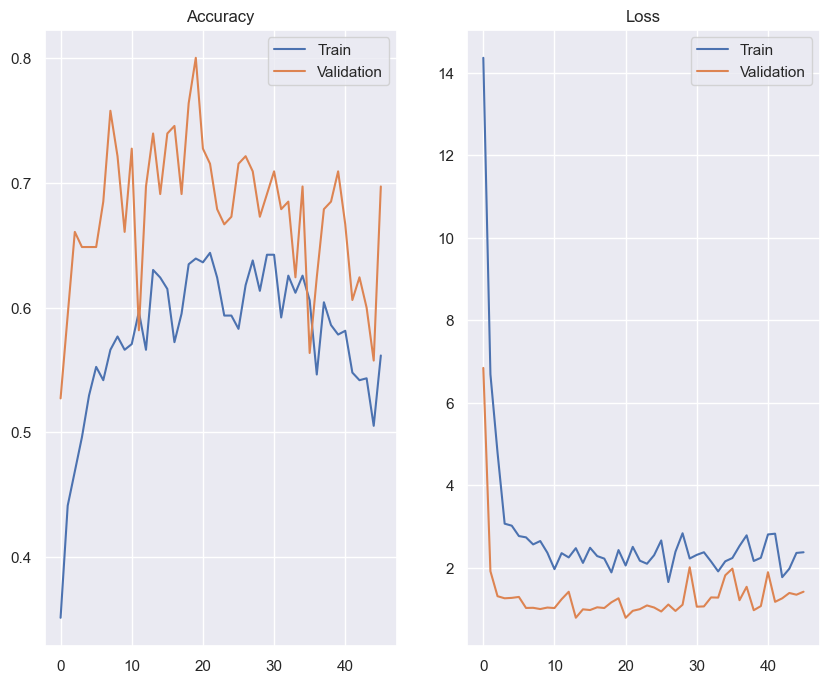

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title('Loss')

In [205]:
train_preds=np.argmax(exercise_model.predict(X_train), axis=1)

26/26 [==============================] - 0s 3ms/step


In [206]:
def get_metrics(y_true, y_preds):
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
    import seaborn as sns
    
    print(accuracy_score(y_true, y_preds))
    sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)
    print(f1_score(y_true, y_preds, average='weighted'))
    print(classification_report(y_true, y_preds))

0.7287104622871047
0.7367359987944471
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       121
           1       0.93      0.58      0.72       110
           2       0.49      0.86      0.62        95
           3       0.43      0.61      0.51        79
           4       0.88      0.94      0.91        65
           5       0.97      0.83      0.89        81
           6       0.90      0.89      0.90        63
           7       0.80      0.75      0.77        59
           8       0.75      0.66      0.70        71
           9       0.60      0.42      0.50        78

    accuracy                           0.73       822
   macro avg       0.77      0.73      0.74       822
weighted avg       0.78      0.73      0.74       822



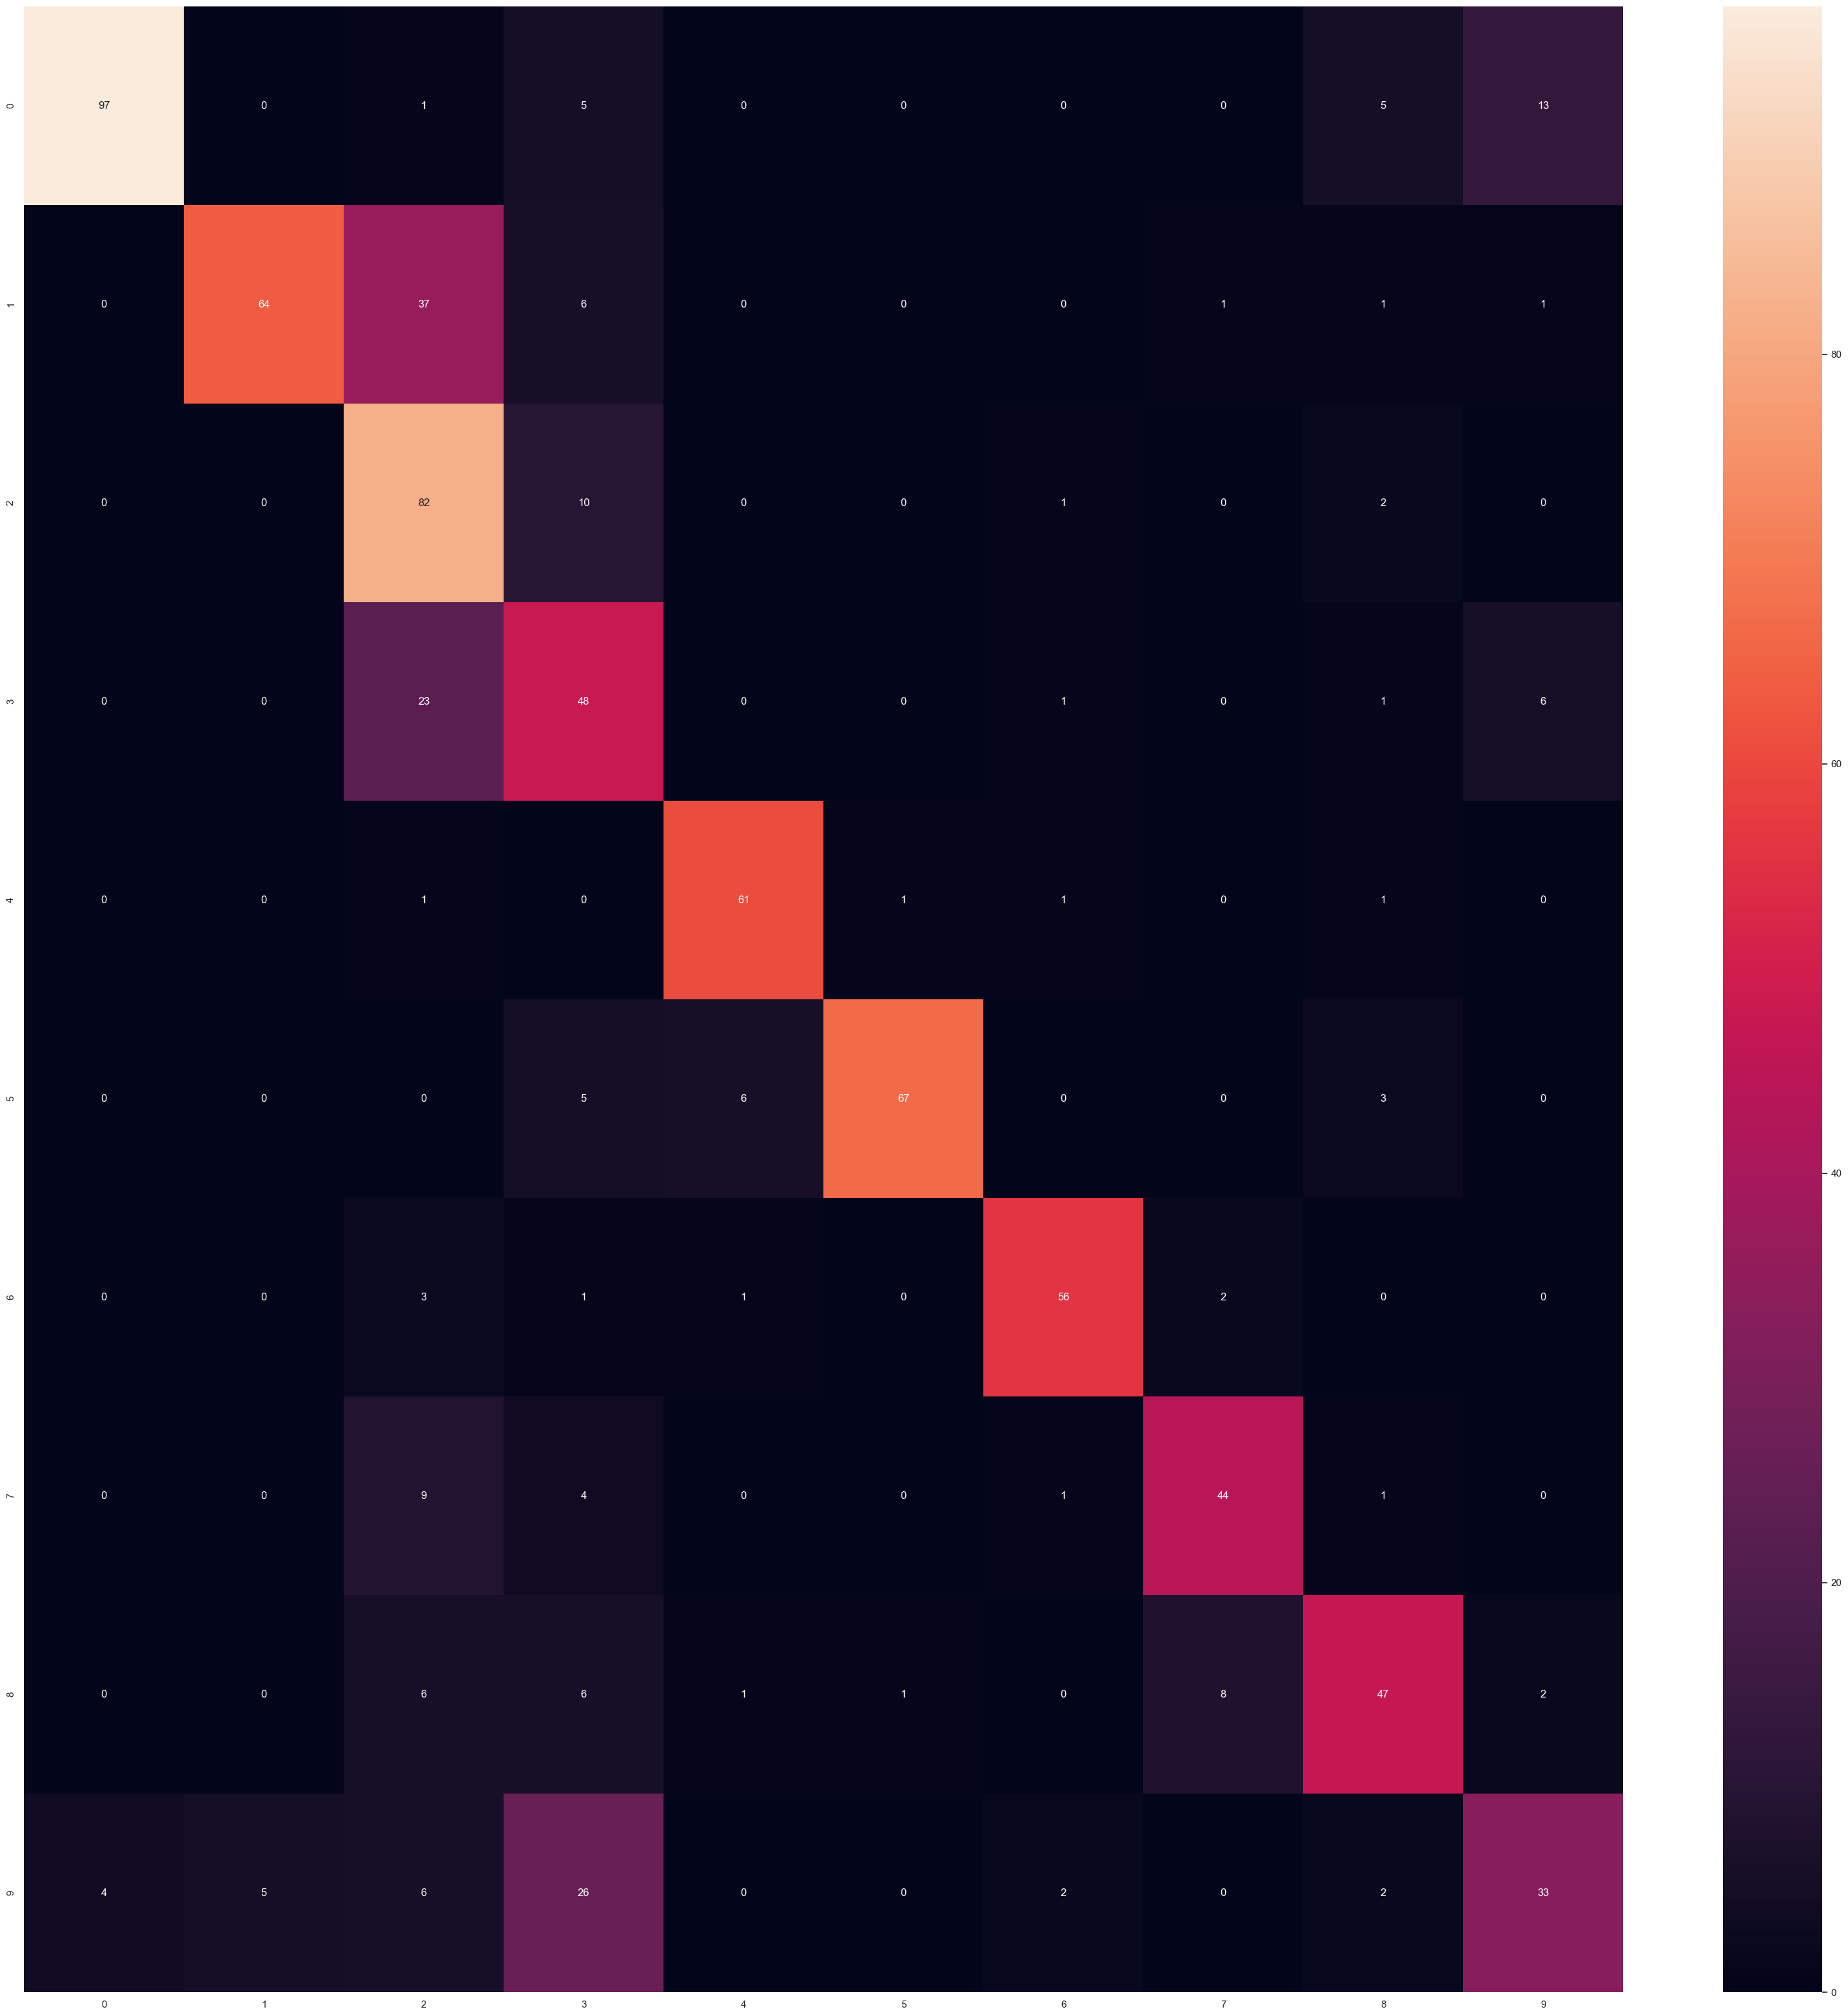

In [207]:
get_metrics(y_train, train_preds)